# Theory: XGBoost 🚀🌟

XGBoost, short for Extreme Gradient Boosting, is a powerful and efficient machine learning algorithm that excels in both classification and regression tasks. It's like the "extreme sports" version of boosting, designed to push the limits of predictive accuracy! 🏂🏆

## Introduction to XGBoost 📈🔥

XGBoost is an ensemble learning technique that combines the predictions of multiple decision trees in a strategic and efficient manner. It has gained widespread popularity in machine learning competitions and real-world applications due to its impressive performance and versatility. 🌲🌲🌲

## How XGBoost Works 🧠🔄

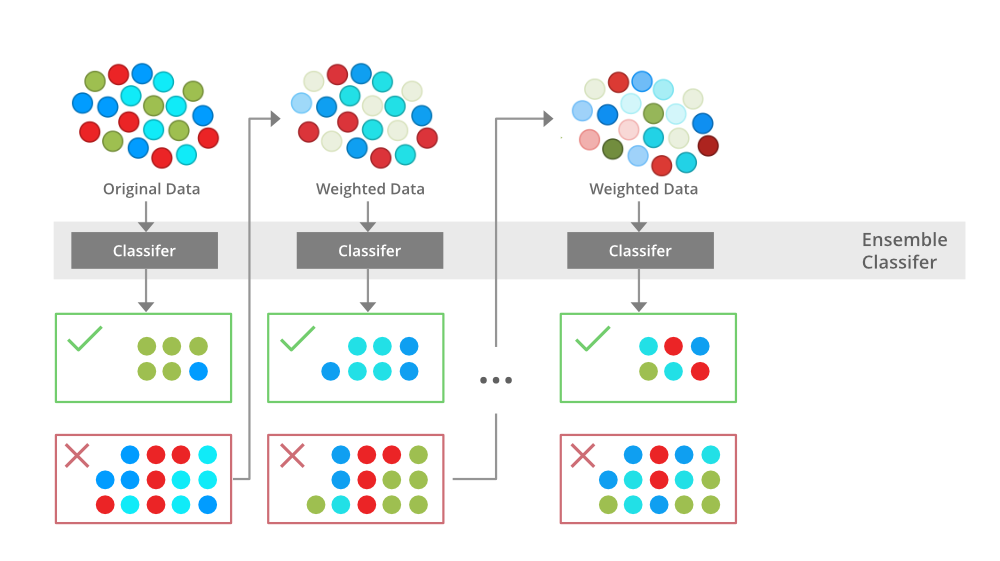

### Gradient Boosting 🌄

XGBoost is based on gradient boosting, which is a technique of building a strong predictive model by adding up the predictions of many weak models (typically decision trees). The key idea is to iteratively correct the errors made by the previous models. XGBoost takes this concept to the next level! 🔄

### Extreme Efficiency 🚀

XGBoost is engineered for efficiency and speed:
- It uses a clever technique called "Gradient Boosting Decision Trees" (GBDT), which combines the strengths of decision trees and gradient boosting.
- It employs parallel processing and tree-pruning techniques to make it blazingly fast.

### Regularization 🧹

XGBoost includes L1 (Lasso) and L2 (Ridge) regularization terms to prevent overfitting and improve model generalization. This is like adding a broom to clean up the messiness of individual trees! 🧹

## Advantages of XGBoost 🌈

XGBoost has several advantages:
1. **High Accuracy**: It often outperforms other algorithms, making it a favorite in machine learning competitions.
2. **Efficiency**: It's fast and memory-efficient, making it suitable for large datasets.
3. **Regularization**: It includes built-in regularization techniques to prevent overfitting.
4. **Feature Importance**: It can rank the importance of features, aiding in feature selection.

## Challenges and Considerations ⚠️

While XGBoost is a powerful tool, here are some considerations:
1. **Hyperparameter Tuning**: It has several hyperparameters that need to be tuned for optimal performance.
2. **Interpretability**: Complex XGBoost models may be harder to interpret compared to simpler models.

## Tips for Using XGBoost Effectively 💡

1. Carefully tune hyperparameters such as `learning_rate`, `max_depth`, and `n_estimators` to optimize model performance.
2. Monitor the training process using early stopping to prevent overfitting.
3. Visualize feature importance to gain insights into your data.

## Conclusion 🎉

XGBoost is a cutting-edge algorithm that combines the strengths of decision trees and gradient boosting to deliver impressive predictive performance. Whether you're tackling classification or regression problems, XGBoost is a valuable tool that can help you achieve exceptional results in your machine learning projects! 🌟🚀


## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

## Dataset
### Data Preprocessing
Data preprocessing is a crucial step in the machine learning pipeline. It involves transforming raw data into an understandable format for machine learning models. This includes tasks such as cleaning, normalization, and encoding.

In [2]:
df = pd.read_csv('iris.csv') # Load the data
df.head() # Show the first 5 rows of the data set

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.columns = df.columns.str.lower() # lowercase the names of columns
df.head()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe().round() # Show the descriptive statistics of the data set

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
count,150.0,150.0,150.0,150.0,150.0
mean,76.0,6.0,3.0,4.0,1.0
std,43.0,1.0,0.0,2.0,1.0
min,1.0,4.0,2.0,1.0,0.0
25%,38.0,5.0,3.0,2.0,0.0
50%,76.0,6.0,3.0,4.0,1.0
75%,113.0,6.0,3.0,5.0,2.0
max,150.0,8.0,4.0,7.0,2.0


In [5]:
df.isnull().sum() #Check for missing values

id               0
sepallengthcm    0
sepalwidthcm     0
petallengthcm    0
petalwidthcm     0
species          0
dtype: int64

In [6]:
df.duplicated().sum() #Check for duplicate values

0

In [7]:
df.corr(numeric_only=True) # Show the correlation matrix

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
id,1.000000,0.716676,-0.397729,0.882747,0.899759
sepallengthcm,0.716676,1.000000,-0.109369,0.871754,0.817954
sepalwidthcm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
petallengthcm,0.882747,0.871754,-0.420516,1.000000,0.962757
petalwidthcm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [8]:
df.drop(['id'], axis=1, inplace=True) # Drop the id column as it is not useful for the model

## Exploratory Data Analysis
Exploratory Data Analysis (EDA) is the process of analyzing and visualizing a dataset to extract insights. It is often the first step in the machine learning pipeline. EDA is a crucial step to better understand the data and prepare it for modeling.

### Bar Plot
It is a plot which represents the frequency of occurrence of each category of a categorical variable.

<Axes: xlabel='species', ylabel='sepallengthcm'>

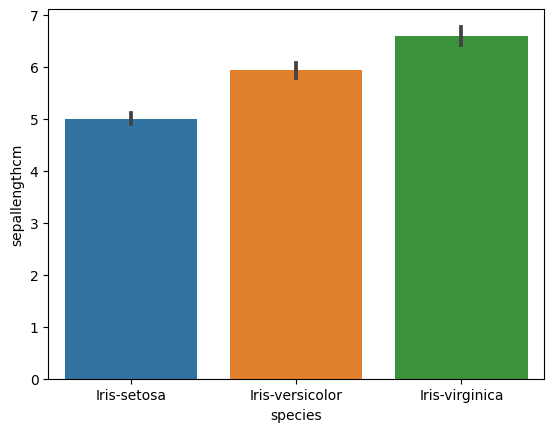

In [9]:
sns.barplot(x='species', y='sepallengthcm', data=df) # Show the barplot of the species and sepal length

<Axes: xlabel='species', ylabel='sepalwidthcm'>

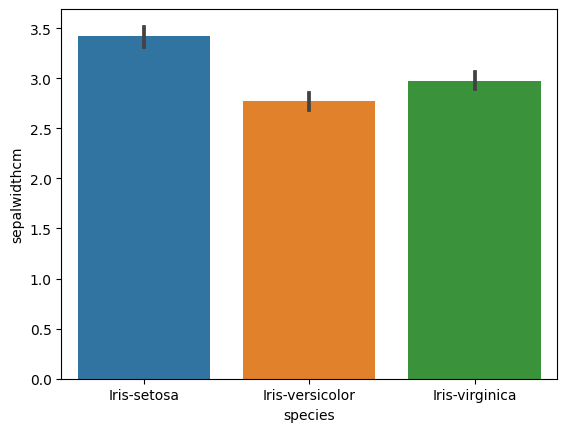

In [10]:
sns.barplot(x='species', y='sepalwidthcm', data=df) # Show the barplot of the species and sepal width

<Axes: xlabel='species', ylabel='petallengthcm'>

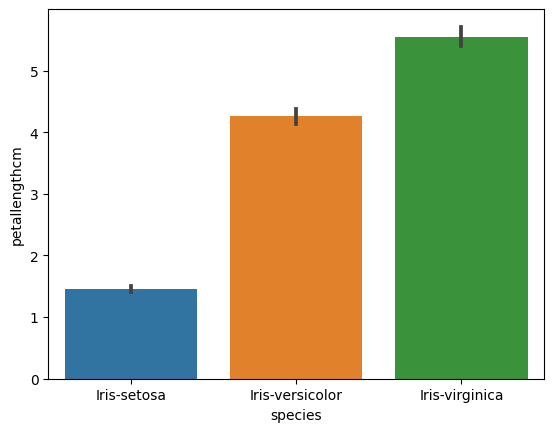

In [11]:
sns.barplot(x='species', y='petallengthcm', data=df) # Show the barplot of the species and petal length

<Axes: xlabel='species', ylabel='petalwidthcm'>

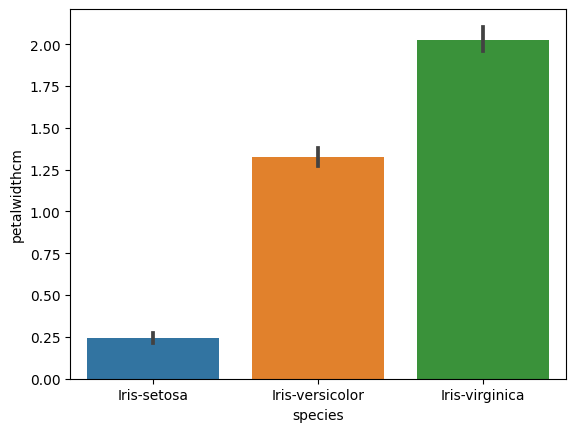

In [12]:
sns.barplot(x='species', y='petalwidthcm', data=df) # Show the barplot of the species and petal width

### Heat Map
It is a plot which represents the correlation between different features of the dataset in the form of a matrix.

<Axes: >

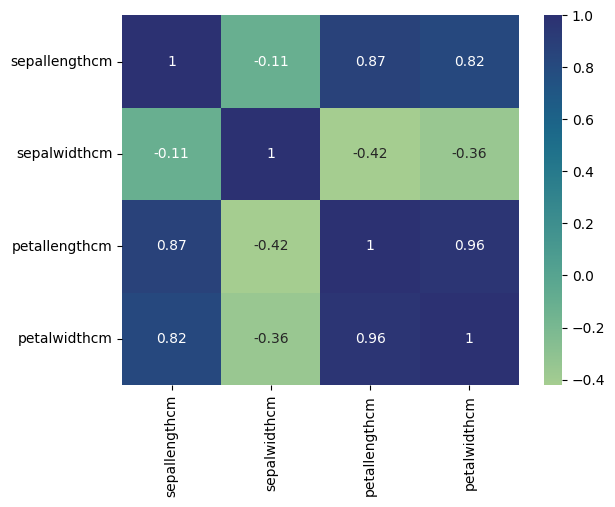

In [13]:
sns.heatmap(df.corr(numeric_only=True), cmap='crest', annot=True) # Plot the heatmap of the correlation matrix

### Pair Plot
It is a plot which represents the relationship between different features of the dataset in the form of a matrix.

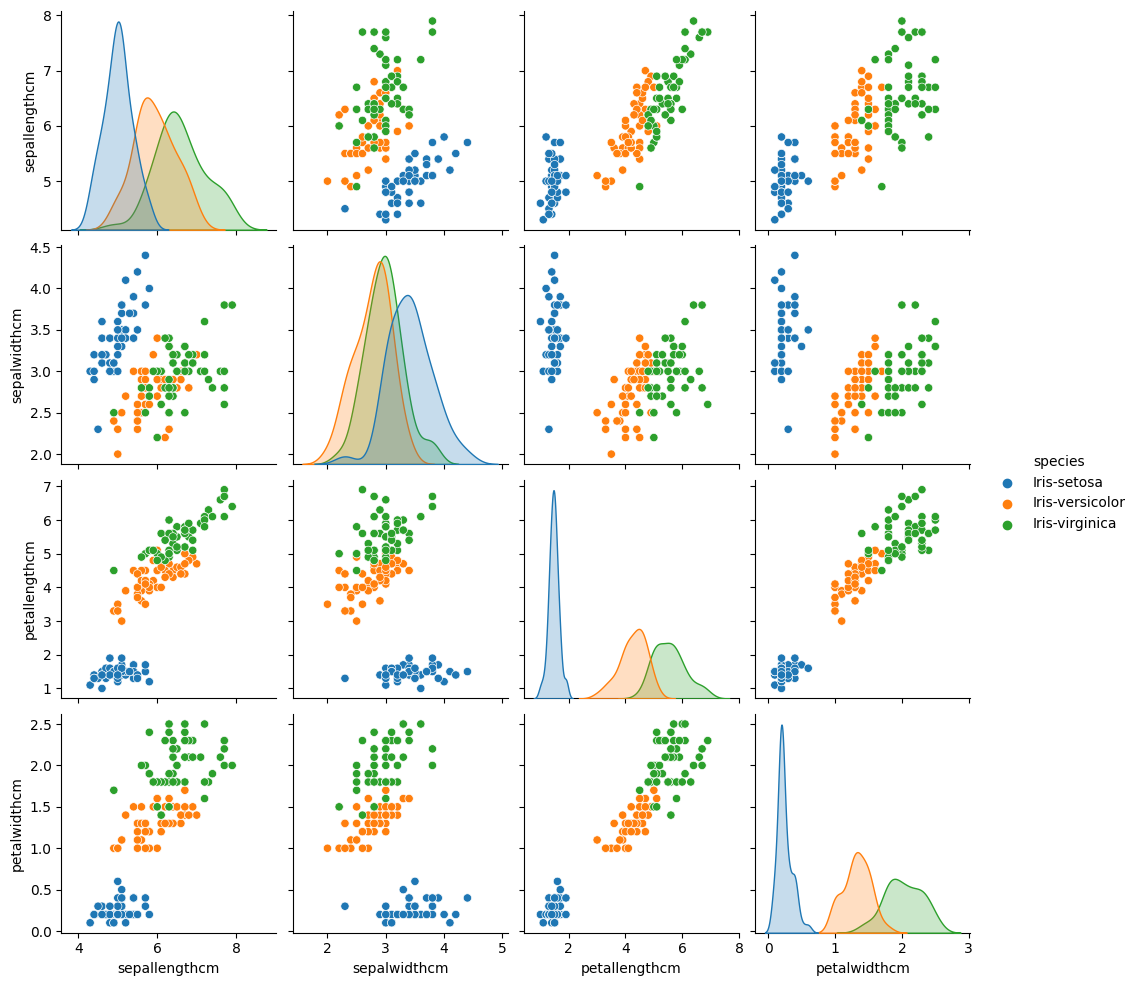

In [14]:
sns.pairplot(df, hue = 'species') # Plot the pairplot of the data set

## Encoding the Categories for the Label
Encoding is the process of converting the categorical data into numerical data.

In [15]:
label_encoder = LabelEncoder() # Encode the species column
labels = label_encoder.fit_transform(df['species'])
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Data Splitting
Data splitting is done to divide the dataset into training and testing data. Training data is used to train the model and testing data is used to test the model.

In [16]:
df.drop(['species'], axis=1, inplace=True) # Drop the species column as it is the dependent variable

x_train, x_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=42) # Split the data set into training and testing sets

In [17]:
len(x_train), len(x_test), len(y_train), len(y_test) # Check the length of the training and testing sets

(120, 30, 120, 30)

## XGBoost
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now.

In [18]:
model = XGBClassifier() # Define the model
model.fit(x_train, y_train) # Fit the model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [19]:
prediction = model.predict(x_test) # Make predictions on the testing set
print("The accuracy of the XGBoost is: ", metrics.accuracy_score(prediction, y_test)*100, "%") # Print the accuracy of the model

The accuracy of the XGBoost is:  100.0 %
